In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
xgboost = pd.read_csv("./metrics/003_xgboost.csv.zip")
decision_tree = pd.read_csv("./metrics/003_decision_tree.csv.zip")
random_forest = pd.read_csv("./metrics/003_random_forest.csv.zip")
mlp = pd.read_csv("./metrics/003_mlpr.csv.zip")

In [3]:
metrics = pd.concat([xgboost,decision_tree,random_forest,mlp])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.891815,2.395064,17.909994,4.232020,0.031895,7.480451,0.066916
0,MLP,0.823579,3.336499,29.206305,5.404286,0.044484,94.463218,0.034669
0,Random Forest,0.674519,4.313456,53.250764,7.297312,0.060338,1.001243,0.038121
0,Decision Tree,0.650605,4.353976,57.841973,7.605391,0.061511,0.062577,0.005138


In [6]:
metrics.to_csv("./metrics/004_best_metrics.csv.zip",index=False,compression="zip")

In [18]:
ttf_order = list(metrics.sort_values(by="time_to_fit")["model"])
ttf_order

['Decision Tree', 'Random Forest', 'XGBoost', 'MLP']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


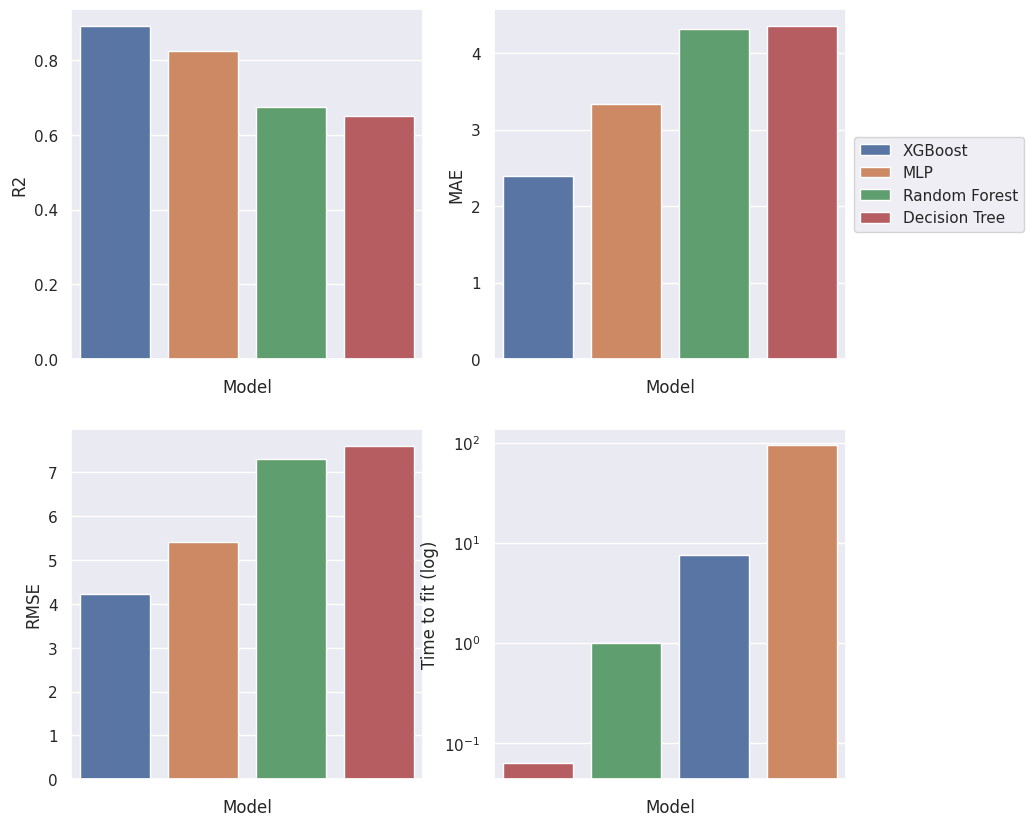

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
# sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
# sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False, order=ttf_order)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# axes[0, 2].set(xlabel="Model",xticklabels=[])
# axes[0, 2].set(ylabel="MSE")
# axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

# axes[1, 1].set(xlabel="Model",xticklabels=[])
# axes[1, 1].set(ylabel="MAPE")
# axes[1, 1].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="Time to fit (log)",yscale="log")
axes[1, 1].get_legend().remove()

plt.savefig("./plots/004_gardiner_flow_only_best_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/004_gardiner_flow_only_best_metrics.png",bbox_inches="tight")
plt.savefig("./plots/004_gardiner_flow_only_best_metrics.pdf",bbox_inches="tight")